In [87]:
import os 
import subprocess
import resource # for timing the subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import six
import time

my_env = os.environ.copy()
my_env['DYLD_LIBRARY_PATH'] = "/Users/jasminexuereb/.opam/4.08.0/lib/z3" 
FNULL = open(os.devnull, 'w') # to hide console output of the subprocess

In [95]:
# initialize list of lists 
# data = [[1, 0.3286395, 0.6484685],[5, 1.940188, 4.663278999999999], [10, 27.780655, 338.726325]] 
data = pd.read_csv("RunningTimes.csv")

# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Complexity', 'Choice', 'Recursion','NestedIFs']) 
df['Complexity'] = df.index+1
df

,Complexity,Choice,Recursion,NestedIFs
0,1,0.331366,0.626491,0.305408
1,2,0.549440,1.091925,1.491831
2,3,0.849766,1.673766,14.475112
3,4,1.283005,2.977393,412.517535
4,5,2.064516,4.905596,inf
5,6,3.247765,7.811802,inf
6,7,6.237525,11.937623,inf
7,8,8.775810,21.111219,inf
8,9,15.075718,55.624460,inf
9,10,29.426453,333.846050,inf


In [89]:
# plt.figure()
# to_plot = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Choice"], how="all")
# ax = to_plot.plot(kind='line', x='Complexity', y='Choice', legend=None, marker='o', color='g')
# plt.title("Choice Monitors")
# plt.xlabel("Complexity")
# plt.ylabel("Time (s)")
# plt.xticks(to_plot['Complexity'])
# plt.savefig("choice_base.png")

# plt.figure()
# to_plot = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Recursion"], how="all")
# ax = to_plot.plot(kind='line', x='Complexity', y='Recursion', legend=None, marker='o', color='b')
# plt.title("Recursion Monitors")
# plt.xlabel("Complexity")
# plt.ylabel("Time (s)")

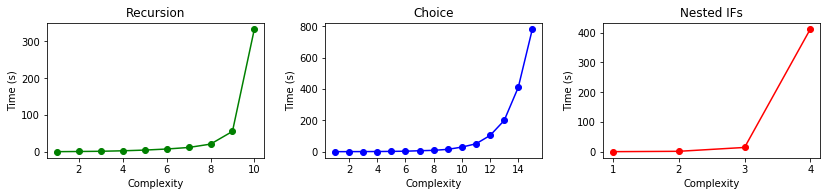

In [129]:
# Creates three subplots and unpacks the output array immediately
# maybe switch to grid
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figheight(3)
f.set_figwidth(12)
f.tight_layout(pad=3.0)

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Recursion"])
ax1.plot(df['Complexity'], df['Recursion'], marker='o', color='g')
ax1.set_title('Recursion')
ax1.set_xlabel("Complexity")
ax1.set_ylabel("Time (s)")

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Choice"])
ax2.plot(df['Complexity'], df['Choice'], marker='o', color='b')
ax2.set_title('Choice')
ax2.set_xlabel("Complexity")
ax2.set_ylabel("Time (s)")
#specify the number of ticks on both or any single axes
ax2.locator_params(axis='x', nbins=10)

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["NestedIFs"])
ax3.plot(df['Complexity'], df['NestedIFs'], marker='o', color='r')
ax3.set_title('Nested IFs')
ax3.set_xlabel("Complexity")
ax3.set_ylabel("Time (s)")
ax3.set_xticks(to_plot['Complexity'])

f.savefig('Figure.png')
